In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sn
import math as math
import time
from prettytable import PrettyTable

# DATA READ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march

/content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march


In [ ]:
df_crab = pd.read_csv("crab_data.txt", sep=";", header=None)
df_crab = df_crab.drop(6,axis=1)
df_crab.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy"]

In [ ]:
df_crab

,Event Number,Cloud Number,X position,Y position,Z position,Energy
0,1,0,21.7369,14.04840,0.002678,0.14664
1,1,1,21.7369,14.04830,0.002701,5.14605
2,1,2,21.7369,14.04840,0.002677,0.03256
3,1,3,21.7369,14.04840,0.002678,0.03317
4,1,4,21.7369,14.04840,0.002678,0.02242
...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,40.70680
785547,40798,12,13.3866,3.13684,4.901980,0.03677
785548,40798,13,13.3866,3.13684,4.901980,0.03825
785549,40798,14,13.3866,3.13684,4.901980,0.32370


In [ ]:
df_albedo_all = pd.read_csv("albedo_data.txt", sep=";", header=None)
df_albedo_all = df_albedo_all.drop(20,axis=1)
df_albedo_all = df_albedo_all.drop(6,axis=1)
df_albedo_all.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy",
                   "Particle Type", "Current Volume", "Previous Volume 1", "Previous Volume 2",
                   "Previous Volume 3", "Previous Volume 4", "Process in Current Volume", 
                   "Process in Prev Vol 1", "Process in Prev Vol 2", "Process in Prev Vol 3"
                   "Process in Prev Vol 4", "Vertex Volume", "Vertex Energy", "Current Step Vol" ]      

In [ ]:
df_albedo_all

,Event Number,Cloud Number,X position,Y position,Z position,Energy,Particle Type,Current Volume,Previous Volume 1,Previous Volume 2,Previous Volume 3,Previous Volume 4,Process in Current Volume,Process in Prev Vol 1,Process in Prev Vol 2,Process in Prev Vol 3Process in Prev Vol 4,Vertex Volume,Vertex Energy,Current Step Vol
0,1,0,8.08324,15.9917,4.99798,0.23182,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
1,1,1,8.08323,15.9917,4.99790,8.44356,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
2,1,2,8.08324,15.9917,4.99798,0.03751,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
3,1,3,8.08324,15.9917,4.99798,0.03751,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
4,1,4,8.08324,15.9917,4.99798,0.37818,2.000000e+00,2.000000e+00,3.300000e+01,1.0,6.0,1.200000e+01,1.000000e+00,1.000000,1.0,1.0,1.0,35.1546,1.000000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,2.039997e-320,2.032092e-320,9.000000e+00,9.0,33.0,2.039997e-320,2.032092e-320,15.000000,33.0,1.0,0.0,5000.0000,2.032092e-320


In [ ]:
df_albedo = df_albedo_all[["Event Number","Cloud Number","X position","Y position","Z position","Energy"]]

In [ ]:
df_albedo

,Event Number,Cloud Number,X position,Y position,Z position,Energy
0,1,0,8.08324,15.9917,4.99798,0.23182
1,1,1,8.08323,15.9917,4.99790,8.44356
2,1,2,8.08324,15.9917,4.99798,0.03751
3,1,3,8.08324,15.9917,4.99798,0.03751
4,1,4,8.08324,15.9917,4.99798,0.37818
...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100
7587425,206563,3,13.56710,25.2265,3.81690,878.22600
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000
7587427,206563,5,17.41190,21.5216,3.26552,452.65000


# DATA PREP

## Crab data

In [ ]:
df_copy = df_crab.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,21.7369,14.04840,0.002678,0.14664,3.187499,2.060057,0.000393
1,1,1,21.7369,14.04830,0.002701,5.14605,111.859174,72.293254,0.013898
2,1,2,21.7369,14.04840,0.002677,0.03256,0.707753,0.457416,0.000087
3,1,3,21.7369,14.04840,0.002678,0.03317,0.721013,0.465985,0.000089
4,1,4,21.7369,14.04840,0.002678,0.02242,0.487341,0.314965,0.000060
...,...,...,...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,40.70680,544.933790,127.656118,199.512168
785547,40798,12,13.3866,3.13684,4.901980,0.03677,0.492225,0.115342,0.180246
785548,40798,13,13.3866,3.13684,4.901980,0.03825,0.512037,0.119984,0.187501
785549,40798,14,13.3866,3.13684,4.901980,0.32370,4.333242,1.015395,1.586771


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,21.7369,14.04840,0.002678,0.14664,3.187499,2.060057,0.000393,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
1,1,1,21.7369,14.04830,0.002701,5.14605,111.859174,72.293254,0.013898,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
2,1,2,21.7369,14.04840,0.002677,0.03256,0.707753,0.457416,0.000087,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
3,1,3,21.7369,14.04840,0.002678,0.03317,0.721013,0.465985,0.000089,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
4,1,4,21.7369,14.04840,0.002678,0.02242,0.487341,0.314965,0.000060,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,40.70680,544.933790,127.656118,199.512168,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849
785547,40798,12,13.3866,3.13684,4.901980,0.03677,0.492225,0.115342,0.180246,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849
785548,40798,13,13.3866,3.13684,4.901980,0.03825,0.512037,0.119984,0.187501,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849
785549,40798,14,13.3866,3.13684,4.901980,0.32370,4.333242,1.015395,1.586771,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849


In [ ]:
df_crab_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_crab_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,21.73690,14.04840,0.002678,0.14664,3.187499,2.060057,0.000393,10.085050,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
1,2,0,15.54700,5.98196,0.012038,0.18359,2.854274,1.098228,0.002210,10.169700,158.108941,60.834765,0.122593,15.547060,5.981963,0.012055
2,3,0,16.85020,14.15960,0.019057,0.27763,4.678121,3.931130,0.005291,10.020920,168.854506,141.892219,0.191043,16.850200,14.159600,0.019064
3,4,0,13.11410,9.45086,0.004892,0.10783,1.414093,1.019086,0.000527,10.056120,131.876963,95.039030,0.048972,13.114100,9.450865,0.004870
4,5,0,10.75710,16.91960,0.002716,0.28594,3.075885,4.837990,0.000777,10.149240,109.176911,171.721081,0.027468,10.757151,16.919600,0.002706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40793,40794,0,19.68710,2.58502,1.620060,0.14464,2.847542,0.373897,0.234325,116.434866,2294.742641,290.154831,197.254503,19.708380,2.491993,1.694119
40794,40795,0,20.93740,21.23630,4.084010,0.10774,2.255795,2.287999,0.440011,198.261000,4152.988819,4176.864915,744.011916,20.947079,21.067507,3.752689
40795,40796,0,6.33129,0.97951,1.108780,0.30525,1.932626,0.298995,0.338455,197.170000,1249.892714,192.540633,219.540219,6.339163,0.976521,1.113457
40796,40797,0,17.53920,19.98850,1.235790,0.19640,3.444699,3.925741,0.242709,197.755000,3469.208764,3952.236165,246.312269,17.542964,19.985518,1.245543


In [ ]:
df_crab_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_crab_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_crab_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_crab_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_crab_weighted

,event_num,xpos,ypos,zpos,energy
0,1,21.736900,14.048349,0.002686,10.085050
1,2,15.547060,5.981963,0.012055,10.169700
2,3,16.850200,14.159600,0.019064,10.020920
3,4,13.114100,9.450865,0.004870,10.056120
4,5,10.757151,16.919600,0.002706,10.149240
...,...,...,...,...,...
40793,40794,19.708380,2.491993,1.694119,116.434866
40794,40795,20.947079,21.067507,3.752689,198.261000
40795,40796,6.339163,0.976521,1.113457,197.170000
40796,40797,17.542964,19.985518,1.245543,197.755000


In [ ]:
df_crab_first_cloud

,event_num,xpos,ypos,zpos,energy
0,1,21.73690,14.04840,0.002678,10.085050
1,2,15.54700,5.98196,0.012038,10.169700
2,3,16.85020,14.15960,0.019057,10.020920
3,4,13.11410,9.45086,0.004892,10.056120
4,5,10.75710,16.91960,0.002716,10.149240
...,...,...,...,...,...
40793,40794,19.68710,2.58502,1.620060,116.434866
40794,40795,20.93740,21.23630,4.084010,198.261000
40795,40796,6.33129,0.97951,1.108780,197.170000
40796,40797,17.53920,19.98850,1.235790,197.755000


In [ ]:
df_crab_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
0,1,0,21.7369,14.04840,0.002678,10.08505
1,1,1,21.7369,14.04830,0.002701,10.08505
2,1,2,21.7369,14.04840,0.002677,10.08505
3,1,3,21.7369,14.04840,0.002678,10.08505
4,1,4,21.7369,14.04840,0.002678,10.08505
...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,67.41780
785547,40798,12,13.3866,3.13684,4.901980,67.41780
785548,40798,13,13.3866,3.13684,4.901980,67.41780
785549,40798,14,13.3866,3.13684,4.901980,67.41780


## Albedo Data

In [ ]:
df_copy = df_albedo.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136
...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [ ]:
df_albedo_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_albedo_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.99170,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,2,0,1.63327,11.67270,4.95589,0.14555,0.237722,1.698961,0.721330,53.39540,87.295362,623.190992,264.427971,1.634885,11.671249,4.952261
2,3,0,13.02660,24.34200,4.93733,0.12630,1.645260,3.074395,0.623585,59.81860,775.915262,1454.375822,295.623981,12.971137,24.313104,4.942008
3,4,0,14.70830,19.51040,4.97863,0.14556,2.140940,2.839934,0.724689,60.59620,891.299586,1182.318645,300.738314,14.708836,19.511432,4.962990
4,5,0,14.40510,8.35959,4.83891,0.11008,1.585713,0.920224,0.532667,62.85690,904.290458,527.132412,305.333833,14.386495,8.386230,4.857602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206559,206560,0,18.30980,1.90798,2.62544,554.17600,10146.851725,1057.356724,1454.955837,9729.86010,227700.461223,48691.369959,9226.839936,23.402234,5.004324,0.948301
206560,206561,0,12.37480,3.35205,2.44539,2245.97000,27793.429556,7528.603738,5492.272578,4430.24160,56006.997423,14001.179535,8006.375355,12.641974,3.160365,1.807210
206561,206562,0,11.42890,3.34512,4.08058,1379.94000,15771.196266,4616.064893,5630.955565,6178.61140,72037.463470,47198.958159,11473.133423,11.659167,7.639088,1.856911
206562,206563,0,10.79510,25.49200,4.61529,270.39600,2918.951860,6892.934832,1247.955955,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [ ]:
df_albedo_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_albedo_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_albedo_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_albedo_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_albedo_weighted

,event_num,xpos,ypos,zpos,energy
0,1,8.083280,15.991810,4.998099,35.15456
1,2,1.634885,11.671249,4.952261,53.39540
2,3,12.971137,24.313104,4.942008,59.81860
3,4,14.708836,19.511432,4.962990,60.59620
4,5,14.386495,8.386230,4.857602,62.85690
...,...,...,...,...,...
206559,206560,23.402234,5.004324,0.948301,9729.86010
206560,206561,12.641974,3.160365,1.807210,4430.24160
206561,206562,11.659167,7.639088,1.856911,6178.61140
206562,206563,14.461813,23.366715,3.717900,6672.81300


In [ ]:
df_albedo_first_cloud

,event_num,xpos,ypos,zpos,energy
0,1,8.08324,15.99170,4.99798,35.15456
1,2,1.63327,11.67270,4.95589,53.39540
2,3,13.02660,24.34200,4.93733,59.81860
3,4,14.70830,19.51040,4.97863,60.59620
4,5,14.40510,8.35959,4.83891,62.85690
...,...,...,...,...,...
206559,206560,18.30980,1.90798,2.62544,9729.86010
206560,206561,12.37480,3.35205,2.44539,4430.24160
206561,206562,11.42890,3.34512,4.08058,6178.61140
206562,206563,10.79510,25.49200,4.61529,6672.81300


In [ ]:
df_albedo_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
0,1,0,8.08324,15.9917,4.99798,35.15456
1,1,1,8.08323,15.9917,4.99790,35.15456
2,1,2,8.08324,15.9917,4.99798,35.15456
3,1,3,8.08324,15.9917,4.99798,35.15456
4,1,4,8.08324,15.9917,4.99798,35.15456
...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,6672.81300
7587425,206563,3,13.56710,25.2265,3.81690,6672.81300
7587426,206563,4,16.77140,21.8459,3.39856,6672.81300
7587427,206563,5,17.41190,21.5216,3.26552,6672.81300


# CLASSIFICATION

1: Source Data
0: Background Data

## Train-Test data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition

In [ ]:
df_crab_weighted = df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 200)]
df_crab_weighted["Class"] = 1
df_albedo_weighted = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 200)]
df_albedo_weighted["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_albedo_weighted = df_albedo_weighted.sample(frac=1).reset_index(drop=True)
df = df_crab_weighted.append(df_albedo_weighted.iloc[0:10176], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop('event_num',axis=1)

In [ ]:
df = df[(df["xpos"]>=0) & (df["ypos"]>=0) & (df["zpos"]>=0) & (df["energy"]>=0)]

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Naive Bayes

In [ ]:

mnb = MultinomialNB()

parameters = {'alpha' : (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}

tuned_nb = GridSearchCV(mnb,
                        parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=3, 
                        refit=True)
                        
tuned_nb.fit(X_train, y_train)


In [ ]:
tuned_nb.best_estimator_

MultinomialNB(alpha=1)

In [ ]:
y_pred = tuned_nb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1997
           1       0.69      0.65      0.67      2071

    accuracy                           0.67      4068
   macro avg       0.67      0.67      0.67      4068
weighted avg       0.67      0.67      0.67      4068



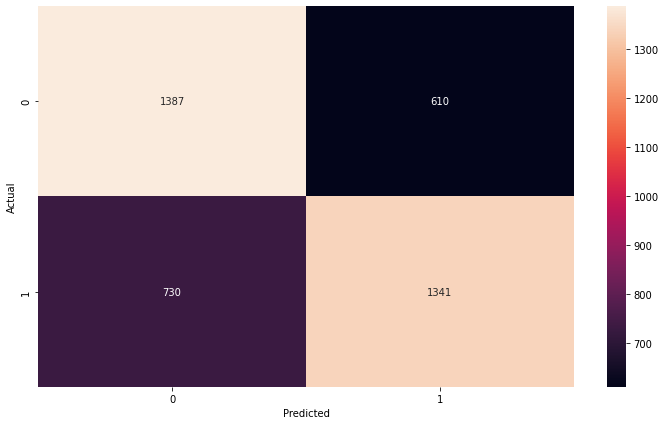

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
nb_score = f1_score(y_test, y_pred, average='micro')
print(nb_score)

0.6705998033431662


## Logistic Regression

In [ ]:
 std_slc = StandardScaler()
 pca = decomposition.PCA()
 logistic_Reg = linear_model.LogisticRegression()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('logistic_Reg', logistic_Reg)])

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

parameters = dict(pca__n_components=n_components,
                  logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty)

In [ ]:
tuned_lr = GridSearchCV(pipe, parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_lr.fit(X_train, y_train)


In [ ]:
tuned_lr.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=4)),
                ('logistic_Reg', LogisticRegression(C=0.0004498432668969444))])

In [ ]:
tuned_lr.best_params_

{'logistic_Reg__C': 0.0004498432668969444,
 'logistic_Reg__penalty': 'l2',
 'pca__n_components': 4}

In [ ]:
y_pred = tuned_lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1999
           1       0.76      0.80      0.78      2070

    accuracy                           0.77      4069
   macro avg       0.77      0.77      0.77      4069
weighted avg       0.77      0.77      0.77      4069



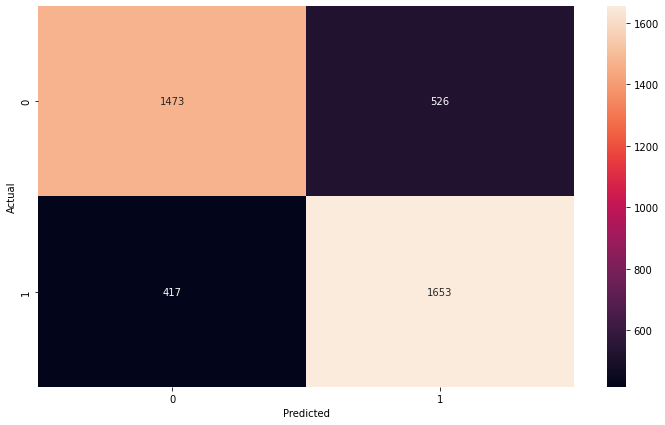

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
lr_score = f1_score(y_test, y_pred, average='micro')
print(lr_score)

0.7682477267141804


## K-Nearest Neighbours

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
knn = KNeighborsClassifier()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('knn', knn)])

In [ ]:
n_components = [3,4]
k_range = list(range(35, 56,5))
we=['uniform', 'distance']
algo_name=['ball_tree', 'brute','kd_tree’']
l_size=[10,20,30]

parameters = dict(pca__n_components=n_components,
                  knn__n_neighbors = k_range,
                  knn__algorithm = algo_name,
                  knn__leaf_size = l_size,
                  knn__weights = we)

In [ ]:
tuned_knn = GridSearchCV(pipe, parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_knn.fit(X_train, y_train)


In [ ]:
tuned_knn.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=4)),
                ('knn',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10,
                                      n_neighbors=45, weights='distance'))])

In [ ]:
tuned_knn.best_params_

{'knn__algorithm': 'ball_tree',
 'knn__leaf_size': 10,
 'knn__n_neighbors': 45,
 'knn__weights': 'distance',
 'pca__n_components': 4}

In [ ]:
y_pred = tuned_knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1999
           1       0.78      0.83      0.80      2070

    accuracy                           0.79      4069
   macro avg       0.80      0.79      0.79      4069
weighted avg       0.80      0.79      0.79      4069



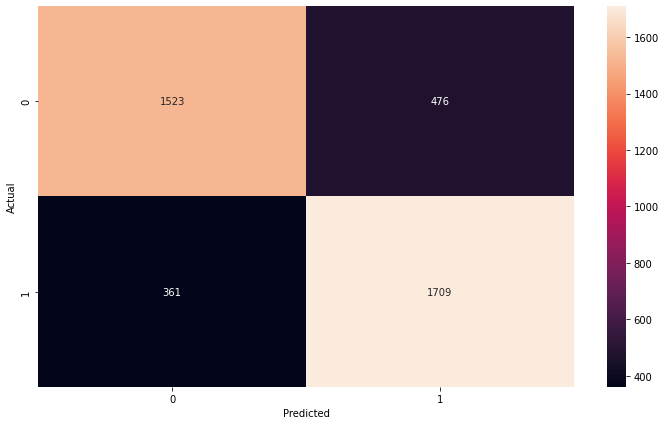

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
knn_score = f1_score(y_test, y_pred, average='micro')
print(knn_score)

0.7942983534037847


## Decision Tree

In [ ]:
std_slc = StandardScaler()
dtree = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('dtree', dtree)])

In [ ]:
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [50,100,150,200,250]
min_samples_split = list(range(2,6))
min_samples_leaf = list(range(1,5))
max_features = ['sqrt','log2']

parameters = dict(dtree__criterion = criterion,
                  dtree__splitter = splitter,
                  dtree__max_depth = max_depth,
                  dtree__min_samples_split = min_samples_split,
                  dtree__min_samples_leaf = min_samples_leaf,
                  dtree__max_features = max_features)

In [ ]:
tuned_dtree = GridSearchCV(pipe, parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_dtree.fit(X_train, y_train)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('dtree', DecisionTreeClassifier())]),
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [50, 100, 150, 200, 250],
                         'dtree__max_features': ['sqrt', 'log2'],
                         'dtree__min_samples_leaf': [1, 2, 3, 4],
                         'dtree__min_samples_split': [2, 3, 4, 5],
                         'dtree__splitter': ['best', 'random']},
             scoring='f1', verbose=1)

In [ ]:
tuned_dtree.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()),
                ('dtree',
                 DecisionTreeClassifier(max_depth=50, max_features='sqrt',
                                        min_samples_leaf=4,
                                        min_samples_split=4))])

In [ ]:
tuned_dtree.best_params_

{'dtree__criterion': 'gini',
 'dtree__max_depth': 50,
 'dtree__max_features': 'sqrt',
 'dtree__min_samples_leaf': 4,
 'dtree__min_samples_split': 4,
 'dtree__splitter': 'best'}

In [ ]:
y_pred = tuned_dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1999
           1       0.80      0.76      0.78      2070

    accuracy                           0.78      4069
   macro avg       0.78      0.78      0.78      4069
weighted avg       0.78      0.78      0.78      4069



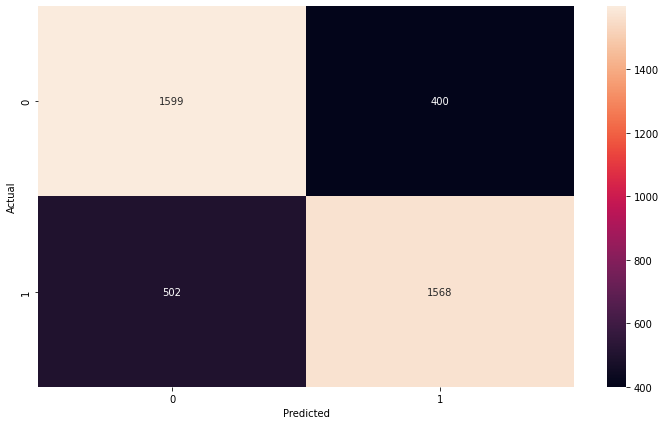

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
dtree_score = f1_score(y_test, y_pred, average='micro')
print(dtree_score)

0.7783239125092161


### Bagging Decision Tree

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
start = time.time()
bg.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = bg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8228
           1       0.96      0.96      0.96      8086

    accuracy                           0.96     16314
   macro avg       0.96      0.96      0.96     16314
weighted avg       0.96      0.96      0.96     16314



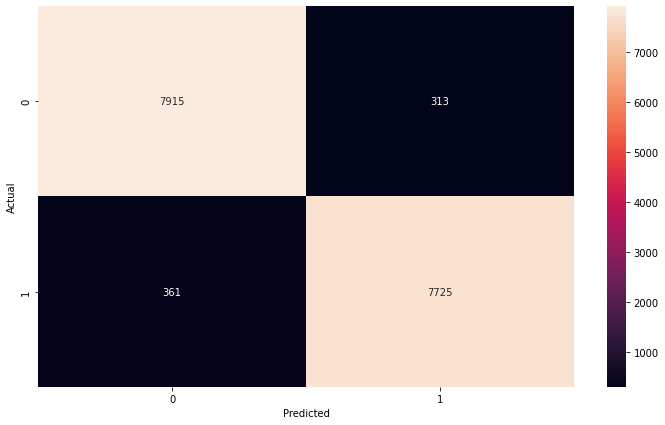

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
bgtree_test = bg.score(X_test, y_test)
bgtree_train = bg.score(X_train, y_train)
bgtree_time = end - start

### Boosted Decision Tree

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
start = time.time()
adb.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = adb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8228
           1       0.95      0.97      0.96      8086

    accuracy                           0.96     16314
   macro avg       0.96      0.96      0.96     16314
weighted avg       0.96      0.96      0.96     16314



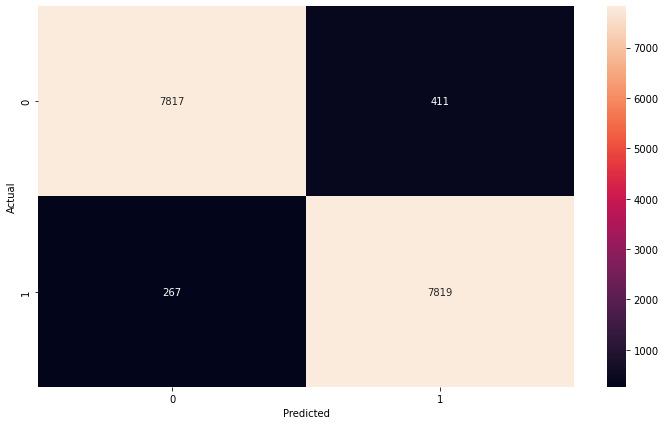

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
boosttree_test = adb.score(X_test, y_test)
boosttree_train = adb.score(X_train, y_train)
boosttree_time = end - start

### Random Forest

In [ ]:
std_slc = StandardScaler()
rf = RandomForestClassifier()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('rf', rf)])

In [ ]:
n_estimators = [150,200,250,300]
criterion = ['gini','entropy']
max_depth = [50,100,150]
min_samples_split = [4,5]
min_samples_leaf = [4,5]
max_features = ['sqrt','log2']


parameters = dict(rf__n_estimators = n_estimators,
                  rf__criterion = criterion,
                  rf__max_depth = max_depth,
                  rf__min_samples_split = min_samples_split,
                  rf__min_samples_leaf = min_samples_leaf,
                  rf__max_features = max_features)

In [ ]:
tuned_rf = GridSearchCV(pipe, parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_rf.fit(X_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [50, 100, 150],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [4, 5],
                         'rf__min_samples_split': [4, 5],
                         'rf__n_estimators': [150, 200, 250, 300]},
             scoring='f1', verbose=1)

In [ ]:
tuned_rf.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=50, max_features='log2',
                                        min_samples_leaf=5, min_samples_split=5,
                                        n_estimators=300))])

In [ ]:
tuned_rf.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 50,
 'rf__max_features': 'log2',
 'rf__min_samples_leaf': 5,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 300}

In [ ]:
y_pred = tuned_rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1999
           1       0.86      0.81      0.84      2070

    accuracy                           0.84      4069
   macro avg       0.84      0.84      0.84      4069
weighted avg       0.84      0.84      0.84      4069



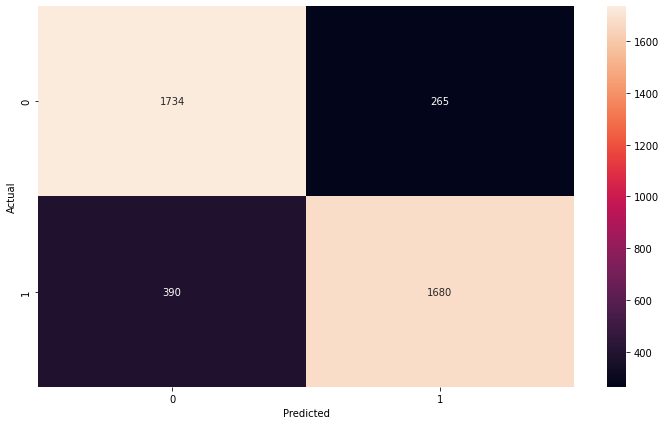

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
rf_score = f1_score(y_test, y_pred, average='micro')
print(rf_score)

0.8390267879085772


### xG Boost

In [ ]:
std_slc = StandardScaler()
xg = XGBClassifier()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('xg', xg)])

In [ ]:
n_estimators = [50,100,150,200]
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [50,100,150,200,300]
min_samples_split = list(range(2,6))
min_samples_leaf = list(range(1,5))
max_features = ['sqrt','log2']


parameters = dict(pca__n_components=n_components,
                  knn__n_neighbors = k_range,
                  knn__algorithm = algo_name,
                  knn__leaf_size = l_size,
                  knn__weights = we)

In [ ]:
tuned_rf = GridSearchCV(pipe, parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_rf.fit(X, y)


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


In [ ]:
tuned_rf.best_estimator_

In [ ]:
tuned_rf.best_params_

In [ ]:
y_pred = tuned_rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
rf_score = f1_score(y_test, y_pred, average='micro')
print(rf_score)

In [ ]:
model = XGBClassifier()
start = time.time()
model.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8228
           1       0.95      0.97      0.96      8086

    accuracy                           0.96     16314
   macro avg       0.96      0.96      0.96     16314
weighted avg       0.96      0.96      0.96     16314



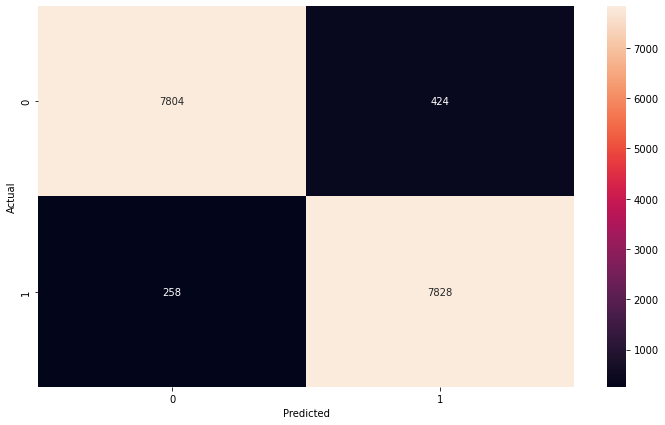

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
xg_test = model.score(X_test, y_test)
xg_train = model.score(X_train, y_train)
xg_time = end - start

## SVM

In [ ]:
lin_svclassifier = SVC(kernel='linear')
start = time.time()
lin_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = lin_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8031
           1       0.93      0.95      0.94      8285

    accuracy                           0.94     16316
   macro avg       0.94      0.94      0.94     16316
weighted avg       0.94      0.94      0.94     16316



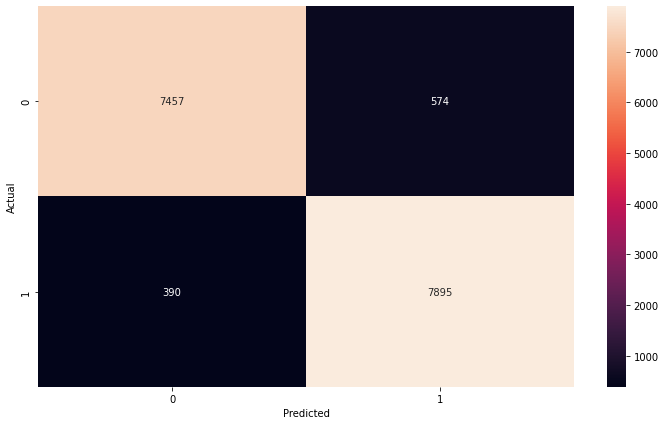

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
lin_svm_test = lin_svclassifier.score(X_test, y_test)
lin_svm_train = lin_svclassifier.score(X_train, y_train)
lin_svm_time = end - start

### Kernel SVM

#### Polynomial Kernel

In [ ]:
poly_svclassifier = SVC(kernel='poly', degree=8)
start = time.time()
poly_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = poly_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      8157
           1       0.62      1.00      0.76      8158

    accuracy                           0.69     16315
   macro avg       0.81      0.69      0.66     16315
weighted avg       0.81      0.69      0.66     16315



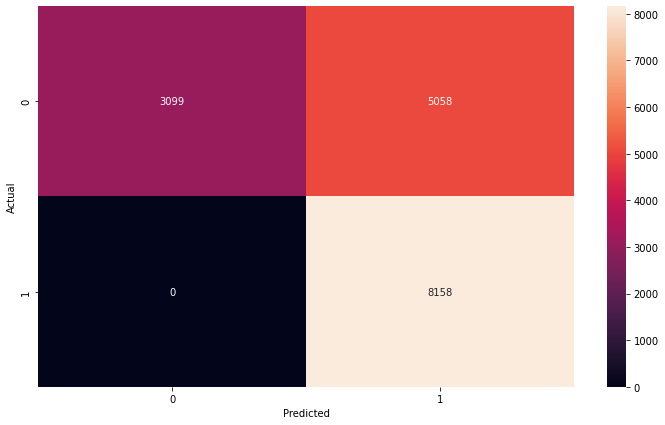

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
poly_svm_test = poly_svclassifier.score(X_test, y_test)
poly_svm_train = poly_svclassifier.score(X_train, y_train)
poly_svm_time = end - start

#### Gaussian Kernel

In [ ]:
g_svclassifier = SVC(kernel='rbf')
start = time.time()
g_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = g_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8157
           1       0.87      0.98      0.92      8158

    accuracy                           0.92     16315
   macro avg       0.92      0.92      0.92     16315
weighted avg       0.92      0.92      0.92     16315



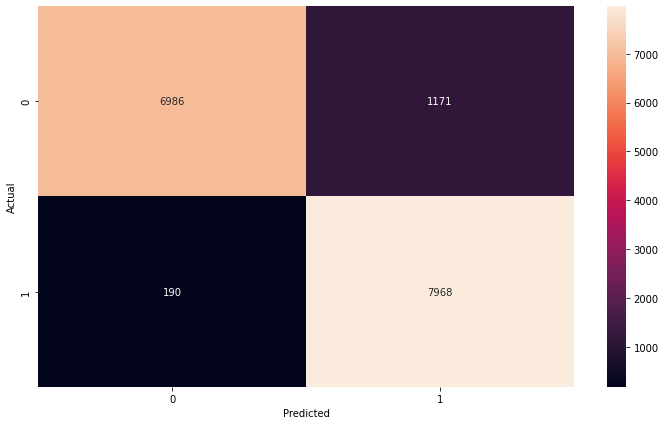

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
gauss_svm_test = g_svclassifier.score(X_test, y_test)
gauss_svm_train = g_svclassifier.score(X_train, y_train)
gauss_svm_time = end - start

#### Sigmoid Kernel

In [ ]:
s_svclassifier = SVC(kernel='sigmoid', random_state =6)
start = time.time()
s_svclassifier.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = s_svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      8157
           1       0.89      0.90      0.89      8158

    accuracy                           0.89     16315
   macro avg       0.89      0.89      0.89     16315
weighted avg       0.89      0.89      0.89     16315



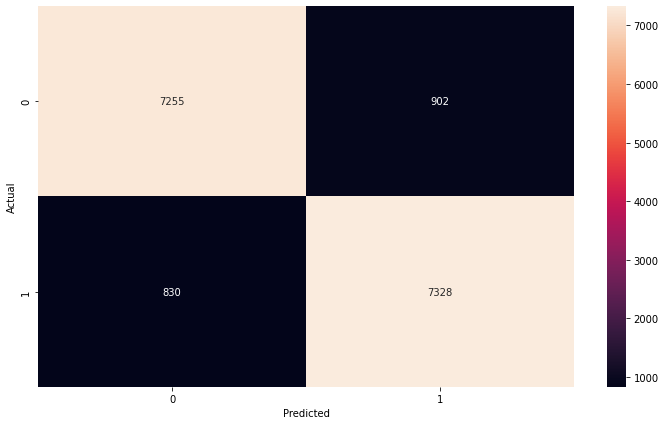

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
sig_svm_test = s_svclassifier.score(X_test, y_test)
sig_svm_train = s_svclassifier.score(X_train, y_train)
sig_svm_time = end - start

## Random Fourier Features

In [ ]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features_train = rbf_feature.fit_transform(X_train)
X_features_test = rbf_feature.fit_transform(X_test)

In [ ]:
clf2=RandomForestClassifier(n_estimators=500,max_depth=100)
start = time.time()
clf2.fit(X_train,y_train)
end = time.time()
y_pred = clf2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8157
           1       0.96      0.97      0.96      8158

    accuracy                           0.96     16315
   macro avg       0.96      0.96      0.96     16315
weighted avg       0.96      0.96      0.96     16315



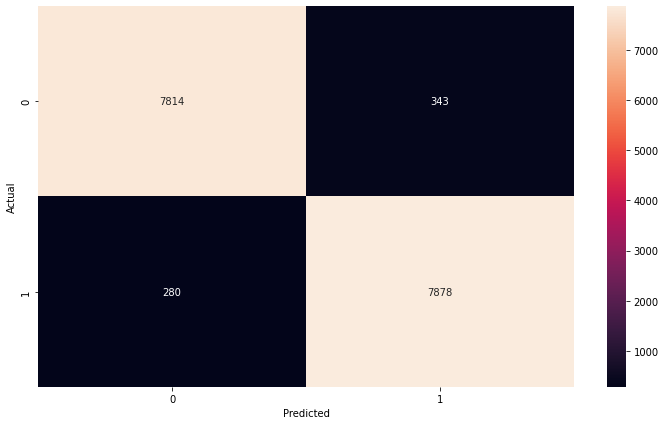

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
rff_test = clf2.score(X_test, y_test)
rff_train = clf2.score(X_train, y_train)
rff_time = end - start

## Voting Classification

In [ ]:
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('clf',clf),('xgboost',model),('svm',lin_svclassifier),('gauss',g_svclassifier)],voting='hard')
start = time.time()
evc.fit(X_train, y_train)
end = time.time()

In [ ]:
y_pred = evc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8031
           1       0.93      0.96      0.95      8285

    accuracy                           0.95     16316
   macro avg       0.95      0.94      0.94     16316
weighted avg       0.95      0.95      0.94     16316



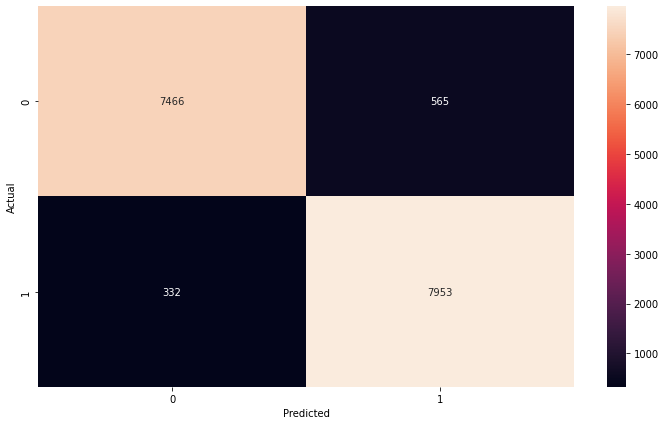

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [ ]:
evc_test = evc.score(X_test, y_test)
evc_train = evc.score(X_train, y_train)
evc_time = end - start

# COMPARISON

## table maker


In [ ]:
from prettytable import PrettyTable

In [ ]:
lin_svm_train= 0.9410980524356047
lin_svm_test= 0.942755577347389
lin_svm_time= 6448.875640153885

evc_train=0.9485144266866888
evc_test=0.9475974503554793
evc_time=6477.967004060745

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score","Time"])
x.border = True
x.header = True
x.padding_width = 3

x.add_row(['Naive Bayes', naive_train,naive_test,naive_time])
x.add_row(['Log. Regression', lr_train,lr_test,lr_time])
x.add_row(['KNN', knn_train,knn_test,knn_time])
x.add_row(['Decision Tree', dtree_train,dtree_test,dtree_time])
x.add_row(['Bagging DT', bgtree_train,bgtree_test,bgtree_time])
x.add_row(['Boosted DT', boosttree_train,boosttree_test,boosttree_time])
x.add_row(['Random Forest', randomtree_train,randomtree_test,randomtree_time])
x.add_row(['xG Boost', xg_train,xg_test,xg_time])
x.add_row(['Linear SVM', lin_svm_train,lin_svm_test,lin_svm_time])
x.add_row(['Poly. Kernel SVM', poly_svm_train,poly_svm_test,poly_svm_time])
x.add_row(['Gaus. Kernel SVM', gauss_svm_train,gauss_svm_test,gauss_svm_time])
x.add_row(['Sig. Kernel SVM', sig_svm_train,sig_svm_test,sig_svm_time])
x.add_row(['Random Fourier Features', rff_train,rff_test,rff_time])
x.add_row(['Voting Classification', evc_train,evc_test,evc_time])


In [ ]:
results = [['Naive Bayes', naive_train,naive_test,naive_time],
           ['Log. Regression', lr_train,lr_test,lr_time],
           ['KNN', knn_train,knn_test,knn_time],
           ['Decision Tree', dtree_train,dtree_test,dtree_time],
           ['Bagging DT', bgtree_train,bgtree_test,bgtree_time],
           ['Boosted DT', boosttree_train,boosttree_test,boosttree_time],
           ['Random Forest', randomtree_train,randomtree_test,randomtree_time],
           ['xG Boost', xg_train,xg_test,xg_time],
           ['Linear SVM', lin_svm_train,lin_svm_test,lin_svm_time],
           ['Poly. Kernel SVM', poly_svm_train,poly_svm_test,poly_svm_time],
           ['Gaus. Kernel SVM', gauss_svm_train,gauss_svm_test,gauss_svm_time],
           ['Sig. Kernel SVM', sig_svm_train,sig_svm_test,sig_svm_time],
           ['Random Fourier Features', rff_train,rff_test,rff_time],
           ['Voting Classification', evc_train,evc_test,evc_time]]

In [ ]:
from operator import itemgetter

sorted_results = sorted(results, key=itemgetter(1))

In [ ]:
names = []
for i in sorted_results:
  names.append(i[0])

In [ ]:
train_score = []
for i in sorted_results:
  train_score.append(i[1])

In [ ]:
test_score = []
for i in sorted_results:
  test_score.append(i[2])

## RESULTS

In [ ]:
print(x)

+-----------------------------+------------------------+------------------------+--------------------------+
|            Models           |      Train Score       |       Test Score       |           Time           |
+-----------------------------+------------------------+------------------------+--------------------------+
|         Naive Bayes         |    0.8905268319593     |   0.8889978547349066   |   0.026775121688842773   |
|       Log. Regression       |   0.9401146219620583   |   0.9409745632853203   |    0.507676362991333     |
|             KNN             |   0.9553617947224862   |   0.9395035243640821   |   0.019122600555419922   |
|        Decision Tree        |          1.0           |   0.945878026356114    |    0.5636541843414307    |
|          Bagging DT         |   0.9845995893223819   |   0.9606497088568802   |    1.9126193523406982    |
|          Boosted DT         |   0.9617518158693187   |   0.9596690162427214   |    1.996999740600586     |
|        Random For

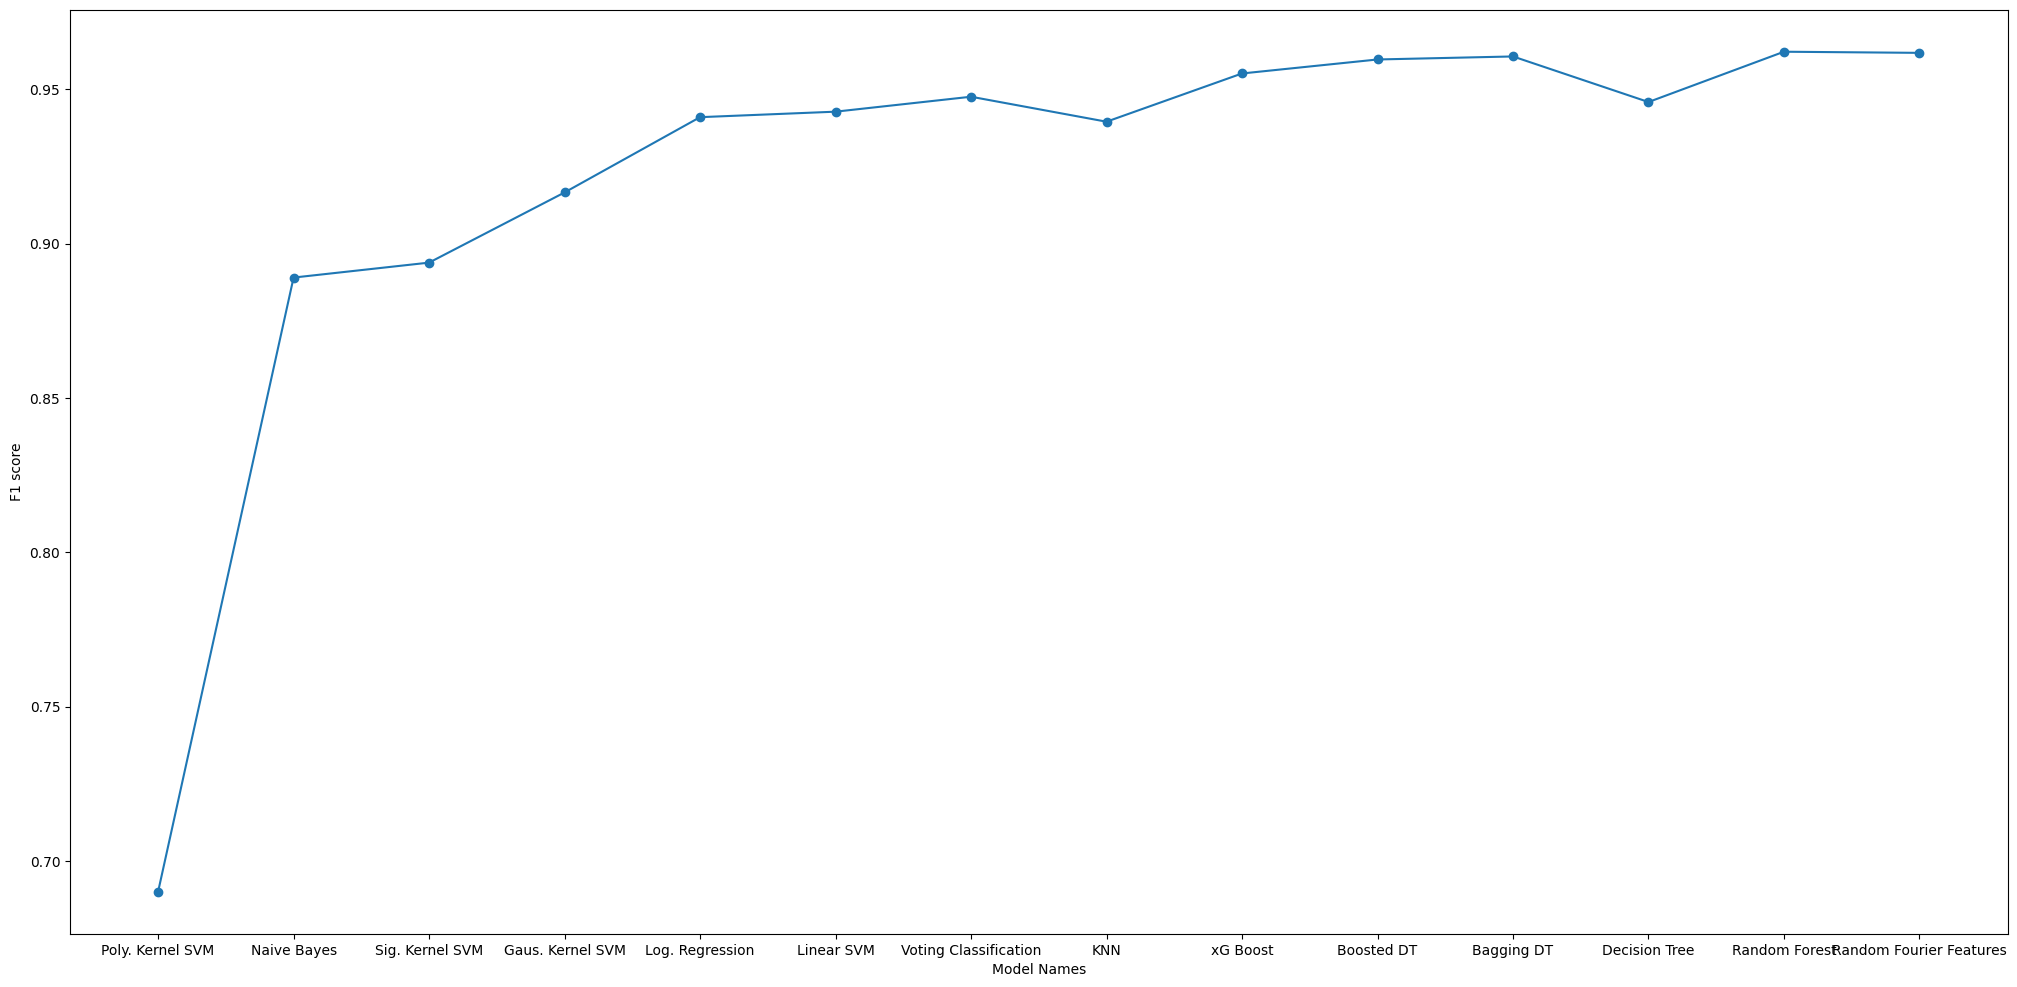

In [ ]:
fig, ax = plt.subplots(figsize=(25, 12))

ax.scatter(names, test_score)
ax.plot(names, test_score)

plt.xlabel("Model Names")
plt.ylabel("F1 score")
plt.show()

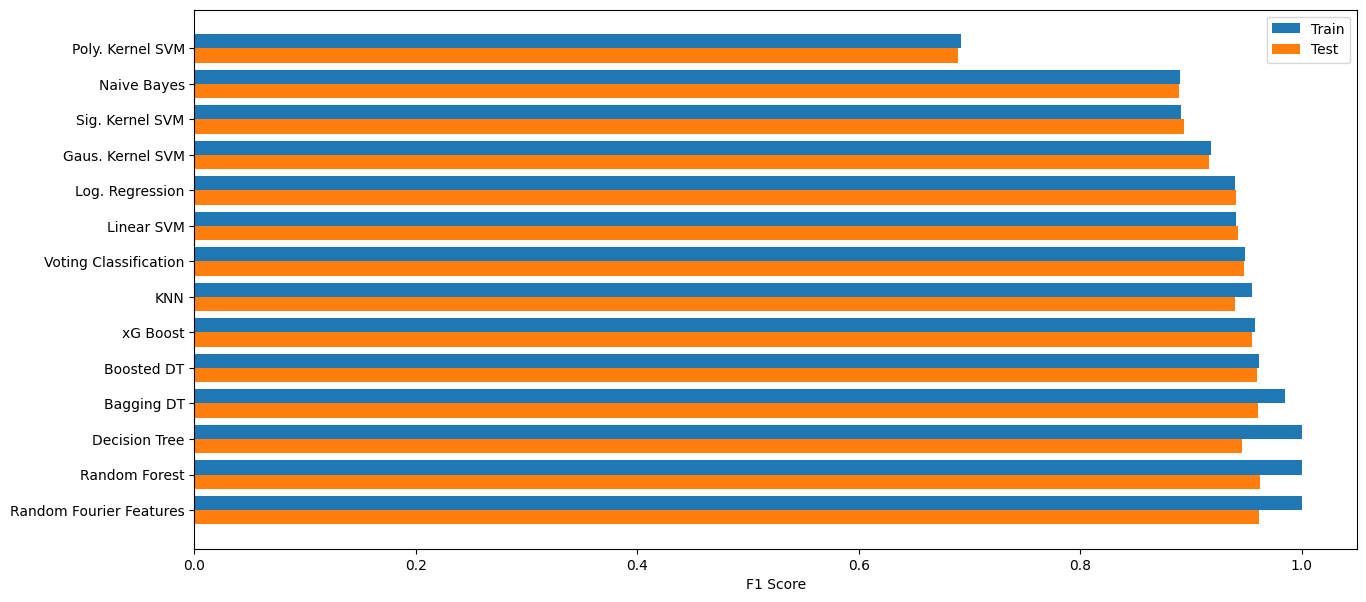

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

ax.barh(y_pos-0.2, train_score, 0.4, label = 'Train')
ax.barh(y_pos+0.2, test_score, 0.4, label = 'Test')


ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('F1 Score')

plt.legend()
plt.show()

# Comparison

In [ ]:

names2 = ['Naive Bayes','Log. Regression','KNN','Decision Tree','Random Forest','xG Boost']

score = [naive_test,lr_test,knn_test,dtree_test,randomtree_test,xg_test]
score1 = [naive_test_1,lr_test_1,knn_test_1,dtree_test_1,randomtree_test_1,xg_test_1]
score2 = [naive_test_2,lr_test_2,knn_test_2,dtree_test_2,randomtree_test_2,xg_test_2]
score3 = [naive_test_3,lr_test_3,knn_test_3,dtree_test_3,randomtree_test_3,xg_test_3]

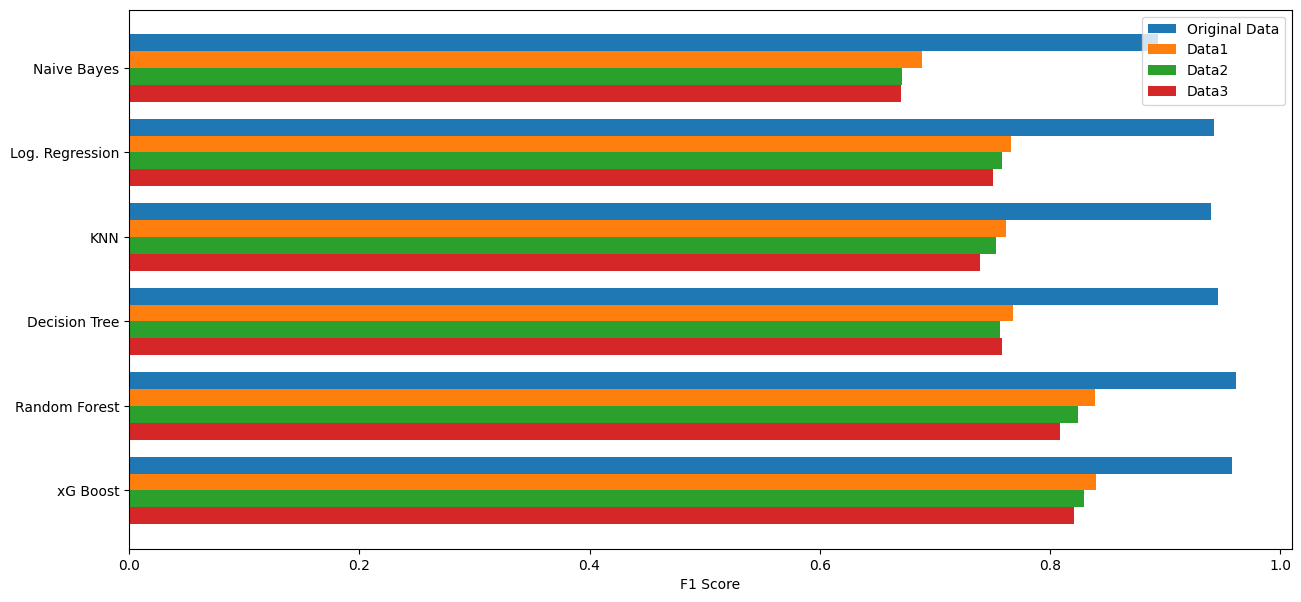

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names2))

ax.barh(y_pos-0.3, score, 0.2, label = 'Original Data')
ax.barh(y_pos-0.1, score1, 0.2, label = 'Data1')
ax.barh(y_pos+0.1, score2, 0.2, label = 'Data2')
ax.barh(y_pos+0.3, score3, 0.2, label = 'Data3')


ax.set_yticks(y_pos)
ax.set_yticklabels( names2)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('F1 Score')

plt.legend()
plt.show()